In [9]:
#Loading the dependent utils fucntion and the model
from utils import *
from model import *

In [10]:
# Get all function names in utils.py
function_names = [name for name in dir() if callable(eval(name))]

# Print the function names
for name in function_names:
    print(name)


DataLoader
Net
exit
get_correct_pred_count
get_ipython
model
plot_data
preprocess_data
quit
summary
test
test_transforms
tqdm
train
train_transforms


In [11]:

# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda")
print("CUDA Available?", cuda)

#Preprocess training data
train_transforms = preprocess_data("train")

#Preprocess test data
test_transforms = preprocess_data("test")


#Load MNIST training data with transformations

train_data = datasets.MNIST('../data',train = True,download=True,transform=train_transforms)
test_data = datasets.MNIST('../data',train = False,download=True,transform=test_transforms)


CUDA Available? True


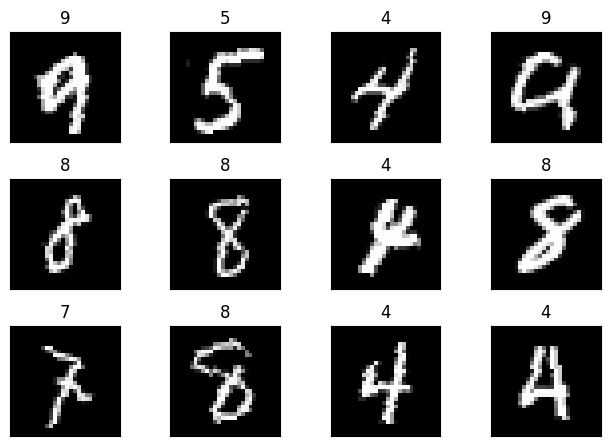

In [12]:
batch_size = 512 

kwargs = {'batch_size': batch_size,'shuffle':True,'num_workers':2,'pin_memory':True}

train_loader = DataLoader(train_data,**kwargs)
test_loader = DataLoader(test_data,**kwargs)

#Print the load trained data 
plot_data(train_loader,12)





In [4]:
help(train)

Help on function train in module utils:

train(model, device, train_loader, optimizer, train_acc)
    Trains the model on the training dataset.
    
    Args:
        model (nn.Module): Model to train.
        device (torch.device): Device to run the training on.
        train_loader (DataLoader): DataLoader for the training dataset.
        optimizer (optim.Optimizer): Optimizer for model parameter updates.
    
    Returns:
        float: Training loss.
        float: Training accuracy.



In [13]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_loss, train_accuracy = train(model, device, train_loader, optimizer,train_acc)
    test_loss, test_accuracy = test(model, device, test_loader,test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    scheduler.step()


Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2479 Batch_id=117 Accuracy=52.21: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.2704, Accuracy: 9184/10000 (91.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1820 Batch_id=117 Accuracy=92.51: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.1099, Accuracy: 9669/10000 (96.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1913 Batch_id=117 Accuracy=95.65: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0714, Accuracy: 9770/10000 (97.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0595 Batch_id=117 Accuracy=96.66: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0524, Accuracy: 9837/10000 (98.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0903 Batch_id=117 Accuracy=97.17: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]


Test set: Average loss: 0.0475, Accuracy: 9851/10000 (98.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0895 Batch_id=117 Accuracy=97.65: 100%|██████████| 118/118 [00:22<00:00,  5.16it/s]


Test set: Average loss: 0.0411, Accuracy: 9865/10000 (98.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0437 Batch_id=117 Accuracy=97.86: 100%|██████████| 118/118 [00:22<00:00,  5.17it/s]


Test set: Average loss: 0.0385, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0904 Batch_id=117 Accuracy=98.02: 100%|██████████| 118/118 [00:22<00:00,  5.16it/s]


Test set: Average loss: 0.0365, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0867 Batch_id=117 Accuracy=98.19: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0334, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0283 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.0293, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1148 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: 0.0280, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0225 Batch_id=117 Accuracy=98.49: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0257, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0851 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0254, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0457 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0244, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0715 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:22<00:00,  5.33it/s]


Test set: Average loss: 0.0233, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0690 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0214, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0996 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0218, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0108 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0211, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0399 Batch_id=117 Accuracy=98.96: 100%|██████████| 118/118 [00:22<00:00,  5.18it/s]


Test set: Average loss: 0.0210, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0753 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:22<00:00,  5.17it/s]


Test set: Average loss: 0.0210, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

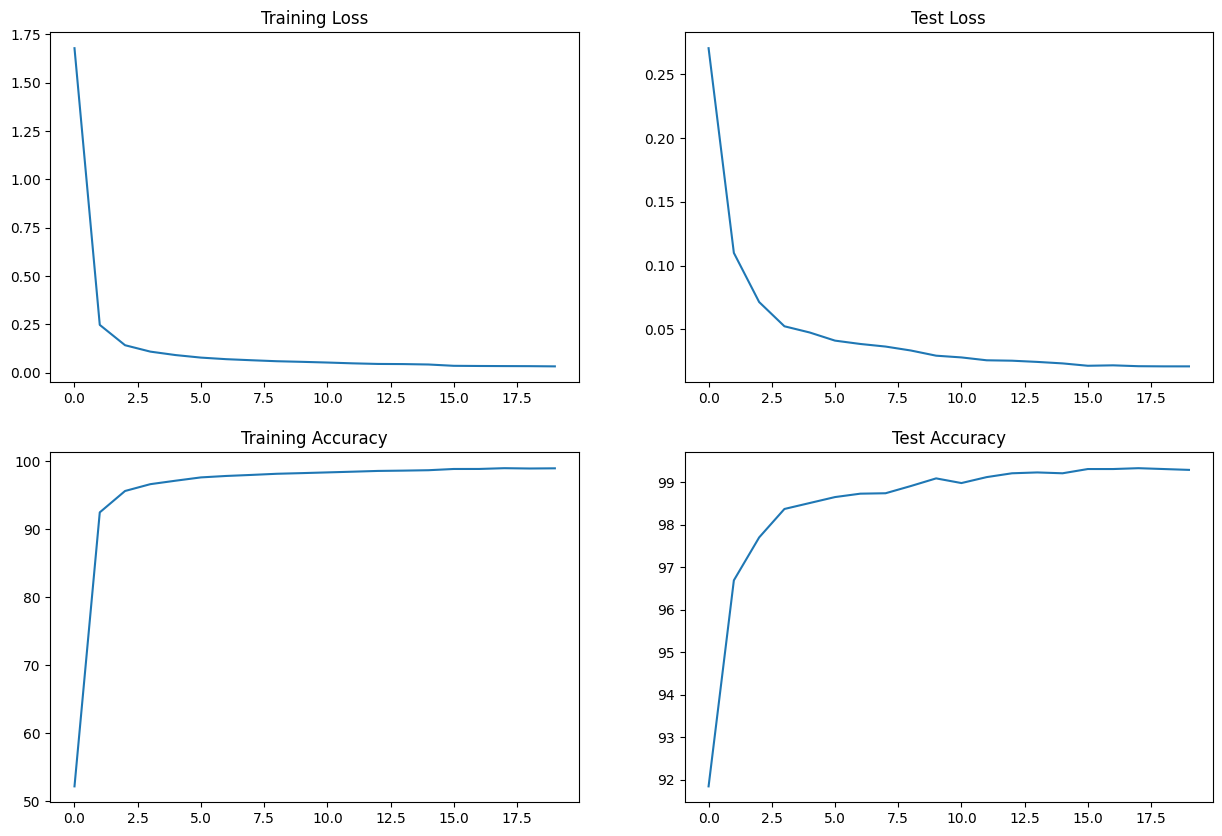

In [14]:
#Plotting the Training and Testing Accuracy and Loss Plots
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [15]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
